# Titanic Classification

## 데이터에 대한 탐색 (EDA)

#### import 및 load data 

In [103]:
# import packages
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint as pp
from sklearn.model_selection import train_test_split

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
# load data
df_train = pd.read_csv('./Input/train.csv')
df_test = pd.read_csv('./Input/test.csv')

# combine data
combine = [df_train, df_test]

#### 데이터 셋에 대한 탐색

In [3]:
# 데이터 셋 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 데이터 셋 정보 확인
pp(df_train.info())
print('-'*40)
pp(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [5]:
# 수치형 변수 확인
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

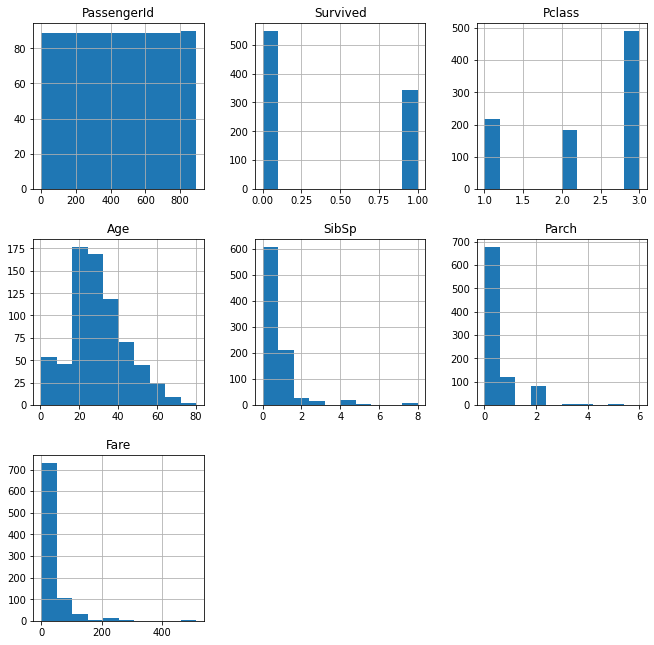

In [6]:
# 수치형 변수 시각화
df_train.hist(figsize=(11,11))

In [7]:
# 범주형 변수 확인
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mamee, Mr. Hanna",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
# 수치형 변수와 생존의 상관계수
df_train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

#### 각 변수에 대한 탐색

In [9]:
# 성별에 따른 생존율
df_train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
# 등급에 따른 생존율
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
df_train[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [12]:
df_train[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


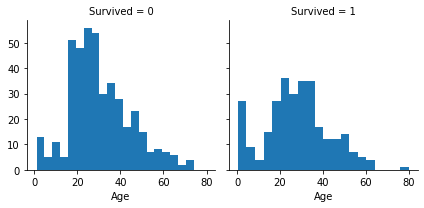

In [13]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

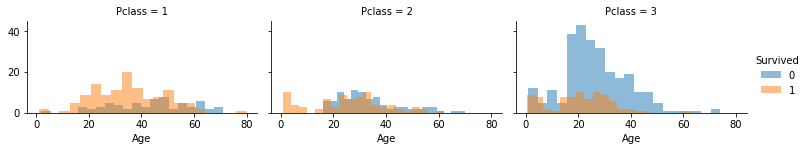

In [14]:
# g = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
g = sns.FacetGrid(df_train, col='Pclass', hue='Survived', height=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=0.5, bins=20)
g.add_legend()

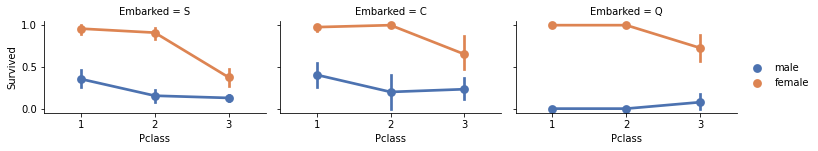

In [15]:
g = sns.FacetGrid(df_train, col='Embarked', height=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=[1,2,3], hue_order=['male', 'female'])
g.add_legend()

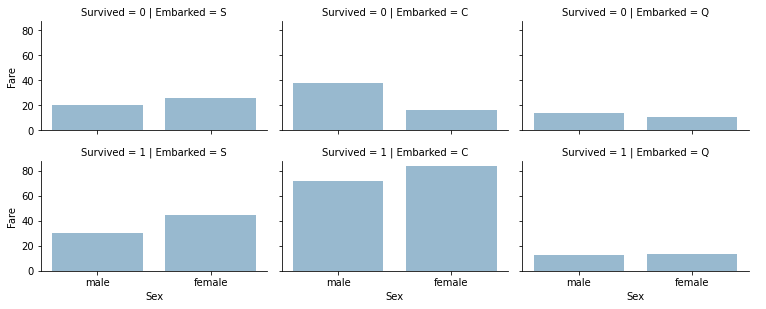

In [16]:
g = sns.FacetGrid(df_train, col='Embarked', row='Survived', height=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None, order=['male', 'female'])
g.add_legend()

## 변수 선별 및 전처리

#### 불필요 변수 삭제 및 파생변수 생성

In [17]:
# Ticket, Cabin 변수 삭제
df_train = df_train.drop(['Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Ticket', 'Cabin'], axis=1)
combine = [df_train, df_test]

In [18]:
# Name에서 Title 파생변수 생성
for dataset in combine :
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
# 파생변수 정제
for dataset in combine :
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
# Name, PassengerId 변수 삭제
df_train = df_train.drop(['Name', 'PassengerId'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
combine = [df_train, df_test]

#### 변수 인코딩

In [21]:
# 파생변수 인코딩
title_map = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine :
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)

In [22]:
# Sex 변수 인코딩
for dataset in combine :
    dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1}).astype(int)

In [23]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


#### 결측치 처리

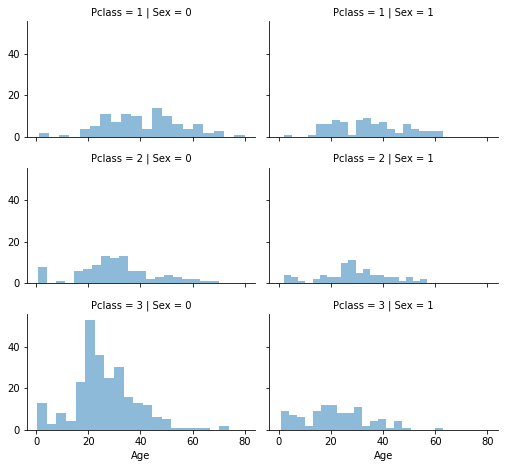

In [24]:
# Age 변수 분포 확인
g = sns.FacetGrid(df_train, row='Pclass', col='Sex', height=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=0.5, bins=20)
g.add_legend()

In [25]:
# Pcalss와 Sex에 따른 Age의 중위수로 imputation
guess_ages = np.zeros((2, 3))

for dataset in combine :
    for i in range(0, 2) :
        for j in range(0, 3) :
            sr_guess = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = sr_guess.median()
            guess_ages[i, j] = int(age_guess/0.5 + 0.5)*0.5
    for i in range(0, 2) :
        for j in range(0, 3) :
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex'] == i) & (dataset['Pclass'] == j+1), 'Age'] = guess_ages[i, j]
    dataset['Age'] = dataset['Age'].astype(int)
    
df_train[df_train['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [26]:
# AgeBand와 생존율 확인
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


#### 변수 구간화

In [27]:
# 위 기준에 따라 Age값 변경
for dataset in combine : 
    dataset.loc[(dataset['Age'] <= 16), 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] >= 64), 'Age'] = 4

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
# AgeBand 변수 삭제
df_train = df_train.drop(['AgeBand'], axis=1)
combine = [df_train, df_test]

In [29]:
# SibSp와 Parch변수 통합
for dataset in combine :
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df_train[['FamilySize', 'Survived']].groupby('FamilySize').mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [30]:
# FamilySize를 IsAlone으로 변환
for dataset in combine :
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1

df_train[['IsAlone', 'Survived']].groupby(['IsAlone']).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [31]:
# IsAlone 외 변수 삭제
df_train = df_train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df_test = df_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [df_train, df_test]

In [32]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [33]:
# Age*Calss 파생변수 추가
for dataset in combine :
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [34]:
df_train.corr()['Survived']

Survived     1.000000
Pclass      -0.338481
Sex          0.543351
Age         -0.037059
Fare         0.257307
Title        0.407753
IsAlone     -0.203367
Age*Class   -0.271008
Name: Survived, dtype: float64

In [35]:
# Embarked 변수 imputation
freq_port = df_train['Embarked'].dropna().mode()[0]

for dataset in combine : 
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [36]:
# Embarked 변수 인코딩
for dataset in combine :
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [37]:
# Fare 변수 중위수로 imputation
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)

In [38]:
# Fare 변수 구간 확인
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(['FareBand']).mean()

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [39]:
for dataset in combine :
    dataset.loc[(dataset['Fare'] <= 7.91), 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31), 'Fare'] = 3

df_train = df_train.drop(['FareBand'], axis=1)
combine = [df_train, df_test]

In [40]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0.0,0,1,0,3
1,1,1,1,2,3.0,1,3,0,2
2,1,3,1,1,1.0,0,2,1,3
3,1,1,1,2,3.0,0,3,0,2
4,0,3,0,2,1.0,0,1,1,6


In [41]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0.0,2,1,1,6
1,893,3,1,2,0.0,0,3,0,6
2,894,2,0,3,1.0,2,1,1,6
3,895,3,0,1,1.0,0,1,1,3
4,896,3,1,1,1.0,0,3,0,3


## 모델 학습 및 평가

#### 데이터 분할

In [42]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop('Survived', axis=1), df_train['Survived'], test_size=0.2, random_state=42)
X_test = df_test.drop('PassengerId', axis=1).copy()

#### Logistic Regression

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = logreg.score(X_val, y_val)
acc_log

0.7932960893854749

In [44]:
df_coeff = pd.DataFrame(df_train.columns.delete(0))
df_coeff.columns = ['Feature']
df_coeff['Correlation'] = pd.Series(logreg.coef_[0])
df_coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.137244
5,Title,0.473420
4,Embarked,0.258617
6,IsAlone,0.186176
7,Age*Class,-0.053644
3,Fare,-0.143286
2,Age,-0.368141
0,Pclass,-1.138431


#### 각종 모델 학습 및 평가

In [45]:
# 함수 정의
def fit_and_score(models) :
    for model in models :
        model.fit(X_train, y_train)
        print('{} accuracy: {}'.format(model, model.score(X_val, y_val)))

In [47]:
# 각종 모델 확인
rnd.seed(42)
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), GaussianNB(), Perceptron(),
          LinearSVC(), SGDClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

fit_and_score(models)

LogisticRegression() accuracy: 0.7932960893854749
SVC() accuracy: 0.7932960893854749
KNeighborsClassifier() accuracy: 0.8379888268156425
GaussianNB() accuracy: 0.7821229050279329
Perceptron() accuracy: 0.7988826815642458
LinearSVC() accuracy: 0.776536312849162
SGDClassifier() accuracy: 0.7988826815642458
DecisionTreeClassifier() accuracy: 0.8324022346368715


/home/hk/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomForestClassifier() accuracy: 0.8156424581005587


#### 모델 튜닝

In [55]:
knn_params = {'n_neighbors' : [3,5,10,20]}
tree_params = {'max_depth' : [3, 5, 7, 10],
             'min_samples_split' : [2, 5, 10]}

In [56]:
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5, scoring='accuracy', n_jobs=5)

In [59]:
knn_model.fit(X_train, y_train)
print(knn_model.best_params_)
print(knn_model.best_score_) 

{'n_neighbors': 5}
0.8033389146065202


In [91]:
knn_model.score(X_val, y_val)

0.8379888268156425

In [58]:
tree_model = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_params, cv=5, scoring='accuracy', n_jobs=5)

In [60]:
tree_model.fit(X_train, y_train)
print(tree_model.best_params_)
print(tree_model.best_score_)

{'max_depth': 5, 'min_samples_split': 5}
0.8075544174135724


In [92]:
tree_model.score(X_val, y_val)

0.7877094972067039

In [89]:
rdf_model = RandomForestClassifier(n_estimators=25, random_state=42)
rdf_model.fit(X_train, y_train)
rdf_model.score(X_val, y_val)

0.8156424581005587

In [102]:
knn_y_proba = knn_model.predict_proba(X_val)
rdf_y_proba = rdf_model.predict_proba(X_val)
y_proba = knn_y_proba + rdf_y_proba
y_pred = np.argmax(y_proba, axis=-1)

In [104]:
accuracy_score(y_pred, y_val)

0.8156424581005587

In [105]:
knn_y_proba = knn_model.predict_proba(X_test)
rdf_y_proba = rdf_model.predict_proba(X_test)
y_proba = knn_y_proba + rdf_y_proba
y_pred = np.argmax(y_proba, axis=-1)

#### 예측결과 저장

In [106]:
submission = pd.DataFrame({
    'PassengerId' : df_test['PassengerId'],
    'Survived' : y_pred
})

submission.to_csv('./Output/submission.csv', index=False)